In [3]:
import pandas as pd
samples = pd.read_json("data/dbpedia_samples.jsonl", lines=True)
categories = sorted(samples["category"].unique())
#print("Categories of DBpedia samples:", samples["category"].value_counts())
samples.head()

,text,category
0,Morada Limited is a textile company based in ...,Company
1,The Armenian Mirror-Spectator is a newspaper ...,WrittenWork
2,Mt. Kinka (金華山 Kinka-zan) also known as Kinka...,NaturalPlace
3,Planning the Play of a Bridge Hand is a book ...,WrittenWork
4,Wang Yuanping (born 8 December 1976) is a ret...,Athlete


In [10]:
import openai
from openai.embeddings_utils import get_embeddings

def open_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as infile:
        return infile.read()

openai.api_key = open_file('openaiapikey.txt')

# NOTE: The following code will send a query of batch size 200 to /embeddings
matrix = get_embeddings(samples["text"].to_list(), engine="text-embedding-ada-002")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(matrix
samples["embed_vis"] = vis_dims.tolist()

SyntaxError: '(' was never closed (3947842676.py, line 3)

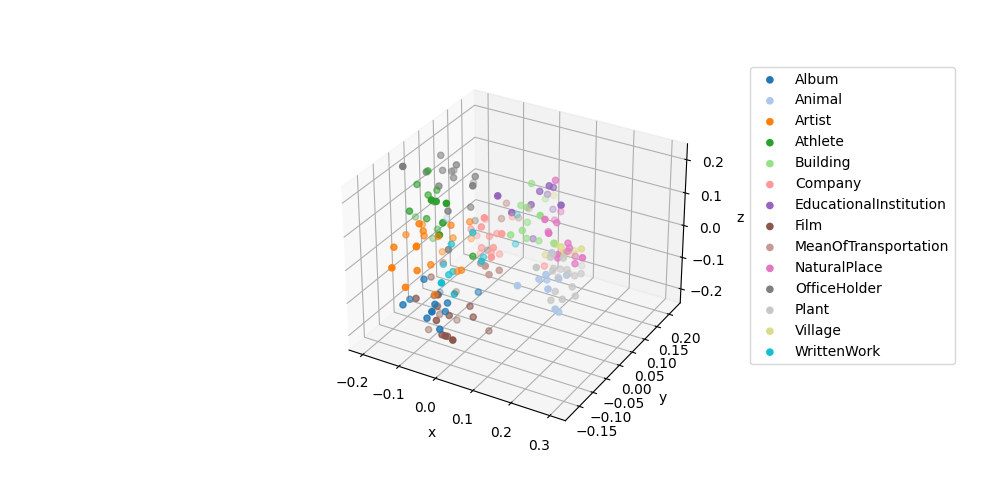

In [17]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

# Plot each sample category individually such that we can set label name.
for i, cat in enumerate(categories):
    sub_matrix = np.array(samples[samples["category"] == cat]["embed_vis"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(bbox_to_anchor=(1.1, 1))
#ax.legend(loc = 'lower right')